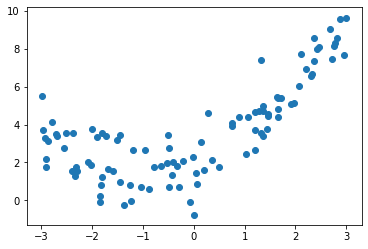

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x. reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

### 使用线性回归

In [3]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.4953707811865009

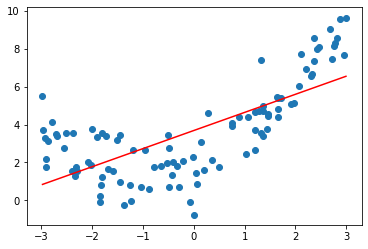

In [4]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [5]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

### 使用多项式回归

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [15]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0987392142417856

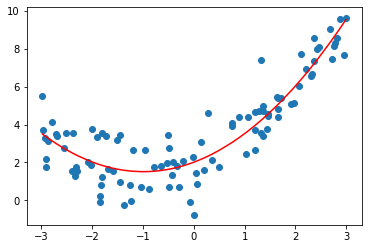

In [16]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

In [17]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)
y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.050846676376417

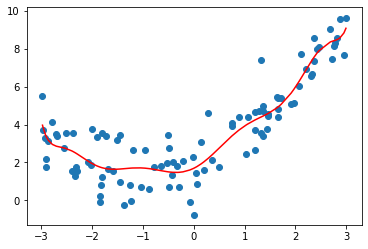

In [19]:
y10_predict = poly10_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

In [20]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)
y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6880004678712686

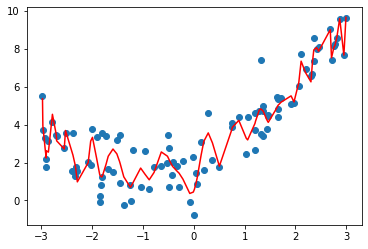

In [21]:
y100_predict = poly100_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

这根曲线只是原有数据点连接出来的结果.
这张图不是特别准确，因为有些x点取不到。
均匀取值x并绘制图像如下

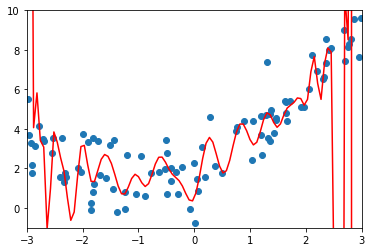

In [27]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)
plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, -1, 10])
plt.show()

In [ ]:
degree越高，对训练样本的拟合越好。
因为当degree足够大，总能找到一根曲线拟合所有的样本点，使得均方误差为0.
虽然拟合结果的均方误差小了，但它并没有真的反应样本点的曲线走势。
它为了拟合所有给定的样本而变得太过复杂，这就是过拟合(over fitting)
相反，如果只是使用一根直线来拟合样本数据，也没有很好的拟合样本的特征。
但它不是太复杂了，而是太简单了，这就是欠拟合(under fitting)